In [1]:
import matplotlib.pyplot as plt
import json
import os

In [8]:
# 従来方法の評価対象logの読み込み
eval_list = ["eval" + str(i) for i in range(4, 9)]
model_list = ["v" + str(i) for i in range(1, 21)]
conventional_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../conventional/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    conventional_accs.append(accs)

In [9]:
# 提案方法の評価対象logの読み込み
eval_list = ["eval40", "eval29", "eval39", "eval28"]
model_list = ["v" + str(i) for i in range(1, 21)]
proposal_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    proposal_accs.append(accs)

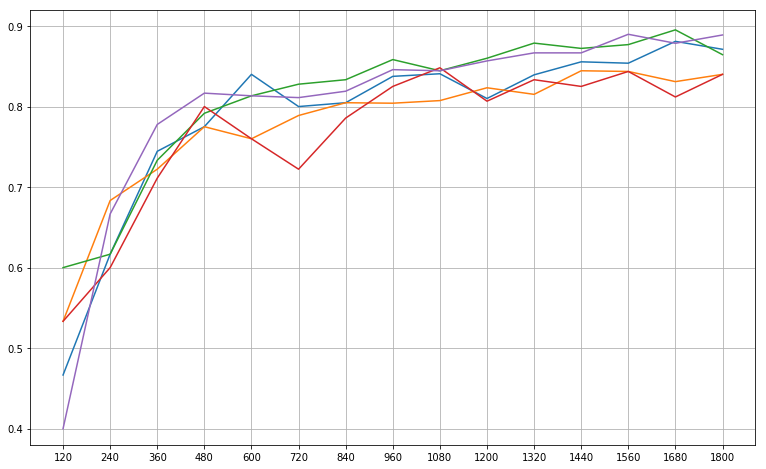

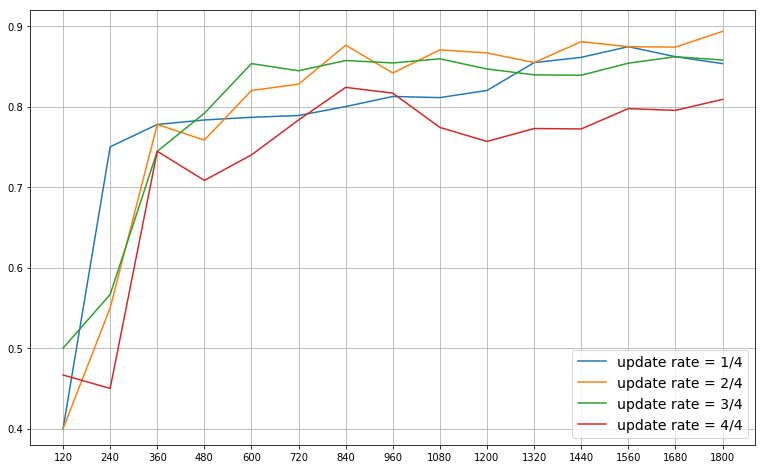

In [13]:
# 従来方法の精度推移の可視化
xlist = list(range(1,16))
ylists = conventional_accs

fig2 = plt.figure(figsize=(13,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*15+1, 120)))
plt.plot(xlist, ylists[0][:15], color="tab:blue")
plt.plot(xlist, ylists[1][:15], color="tab:orange")
plt.plot(xlist, ylists[2][:15], color="tab:green")
plt.plot(xlist, ylists[3][:15], color="tab:red")
plt.plot(xlist, ylists[4][:15], color="tab:purple")
plt.grid(True)

# 提案方法の精度推移の可視化
xlist = list(range(1,16))
ylists = proposal_accs

fig1 = plt.figure(figsize=(13,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*15+1, 120)))
plt.plot(xlist, ylists[0][:15], color="tab:blue", label="update rate = 1/4") # 1/4update, queryN=10
plt.plot(xlist, ylists[1][:15], color="tab:orange", label="update rate = 2/4") # 1/4update, queryN=10
plt.plot(xlist, ylists[2][:15], color="tab:green", label="update rate = 3/4") # 3/4update, queryN=10
plt.plot(xlist, ylists[3][:15], color="tab:red", label="update rate = 4/4") # 4/4update, queryN=10
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)

In [3]:
# 提案方法の収束速度の読み込み
eval_list = ["eval40", "eval29", "eval39", "eval28"]
model_list = ["v" + str(i) for i in range(1, 21)]
prop_train_err_speeds = []
prop_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    prop_train_err_speeds.append(train_err_speeds)
    prop_test_err_speeds.append(test_err_speeds)

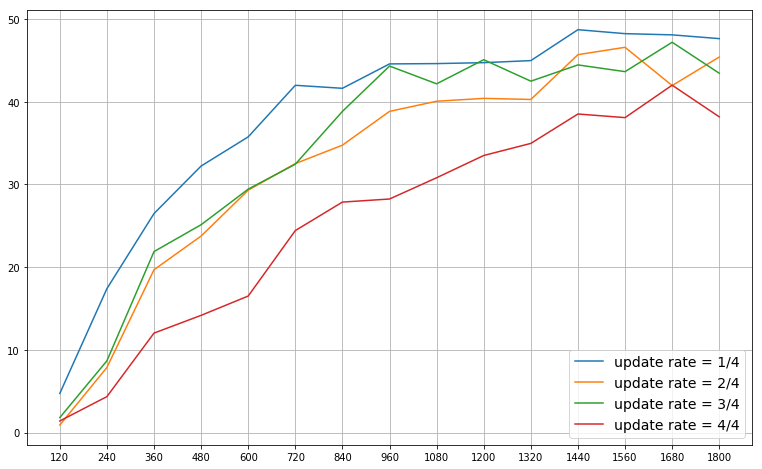

In [12]:
# 提案方法
xlist = list(range(1,16))

fig1 = plt.figure(figsize=(13,8))
plt.xticks(xlist, list(range(120, 120*15+1, 120)))
plt.plot(xlist, prop_train_err_speeds[0][:15], color="tab:blue", label="update rate = 1/4") # 1/4update, queryN=10
plt.plot(xlist, prop_train_err_speeds[1][:15], color="tab:orange", label="update rate = 2/4") # 1/4update, queryN=10
plt.plot(xlist, prop_train_err_speeds[2][:15], color="tab:green", label="update rate = 3/4") # 3/4update, queryN=10
plt.plot(xlist, prop_train_err_speeds[3][:15], color="tab:red", label="update rate = 4/4") # 4/4update, queryN=10
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)